# Actividad 3 - Mapas de calor y boxplots
## Equipo 3:
#### Carlos Damián Suárez Bernal
#### Aylín Millán Cázares
#### Adrián Lozano González
#### Jennifer Lizeth Avendaño Sánchez

##### Los objetivos de esta actividad, son los siguientes:
* Corroborar si existe correlación o dispersión entre los seguidores, seguidos y cuentas verificadas. Además de observar los hashtags más utilizados en ese período seguido del día en el que existieron más tweets, esto para relacionarlo con un evento revant

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

data = pd.read_csv("covid19_tweets.csv")
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


### Remover columnas innecesarias

In [ ]:
data = data.drop(['user_name'], 1)
data = data.drop(['user_location'],1)
data = data.drop(['user_description'],1)
data = data.drop(['is_retweet'],1)
data

<ipython-input-7-f47268b799a2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['user_name'], 1)
<ipython-input-7-f47268b799a2>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['user_location'],1)
<ipython-input-7-f47268b799a2>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['user_description'],1)
<ipython-input-7-f47268b799a2>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['is_retweet'],1)


,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone
1,2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android
2,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android
3,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone
4,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android
...,...,...,...,...,...,...,...,...,...
74431,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone
74432,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App
74433,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,Community workers in Tianshan District of Urum...,"['China', 'Xinjiang']",Twitter Web App
74434,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone


In [ ]:
data.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


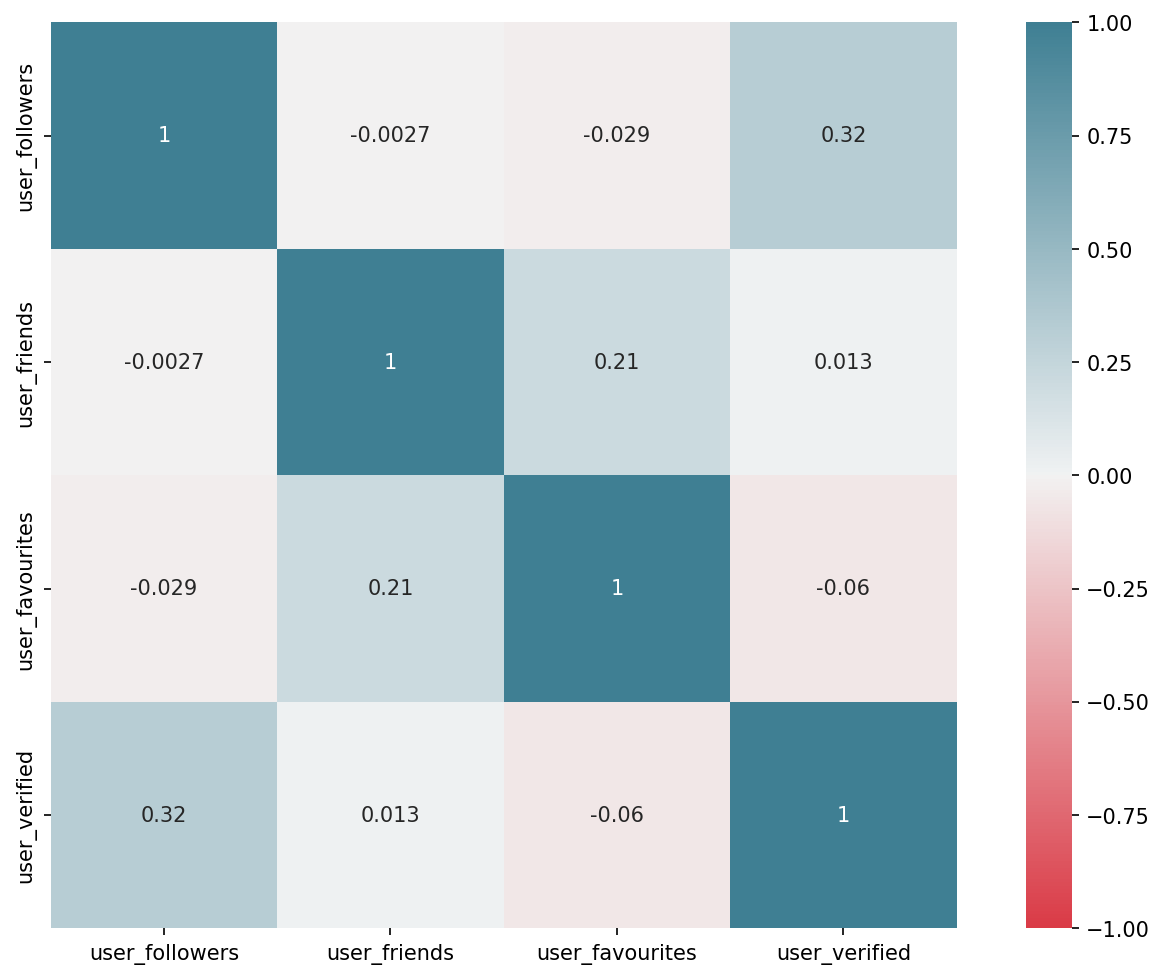

In [ ]:
import seaborn as sns

corr = data.corr()
fig, ax = plt.subplots(figsize=(12, 8), dpi = 150)
paleta = sns.diverging_palette(220, 10,as_cmap=True).reversed()
sns.heatmap(corr, vmin= -1, vmax=1, cmap= paleta,
            square=True, annot=True, ax=ax)
plt.show()

#### Este mapa de calor indica la correlación entre los datos del usuario (verificado, seguidores, seguidos y likes dados). La mayor correlación existente es entre la verificación y los seguidores. Esto quiere decir que los usuarios veri

([<matplotlib.patches.Wedge at 0x7fa623f318b0>,
 [Text(-1.0153858213797513, 0.42307402867697735, 'False'),
  Text(1.0153858015742254, -0.42307407621061827, 'True')],
 [Text(-0.5538468116616825, 0.230767652005624, '87.4%'),
  Text(0.5538468008586683, -0.2307676779330645, '12.6%')])

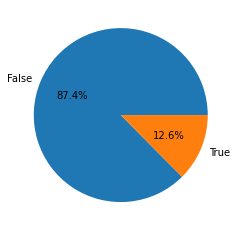

In [ ]:
verified = data['user_verified'].value_counts()
verifiedlab = ['False', 'True']

plt.pie(verified, labels=verifiedlab, autopct= "%.1f%%")


#### Esta gráfica muestra el porcentaje de usuarios que twittearon en ese día que eran verificados o no verificados. Muestra que existe una mayor cantidad de usuarios sin verificar.



In [ ]:
import re
def hashtag_collector(text):
    list_of_hashtags = re.findall(r"#[A-Za-z0-9\-\.\_]+",text,re.DOTALL)
    if(list_of_hashtags != None) :
        list_of_hashtags = [word.replace('#', '') for word in list_of_hashtags]
        list_of_hashtags = [word.replace('.', '') for word in list_of_hashtags]
        list_of_hashtags = [word.upper() for word in list_of_hashtags]
    return list_of_hashtags

data['hashtags'] = data['text'].apply(hashtag_collector)

hashtagCounts = sum(data['hashtags'],[])
relacionHashtags = {}
for i in hashtagCounts:
  relacionHashtags[i] = hashtagCounts.count(i)

relacionHashtags

{'COVID19': 41939,
 'CORONAVIRUSUPDATES': 249,
 'CORONAVIRUS': 4305,
 'RECRUITING': 3,
 'COVIDPOSITIVE': 4,
 'HURRICANEHANNA': 27,
 'LOGO': 6,
 'GRAPHICDESIGNER': 2,
 'LOGODESIGN': 5,
 'LOGODESINGER': 1,
 'ICON': 1,
 'MINIMALIST': 3,
 'ABSTRACT': 4,
 'KEEPSOCIALDISTANCE': 1,
 'TAMILNADU': 65,
 'CHENNAI': 26,
 'HOMEWORK': 2,
 'LIGHT': 1,
 'WASH': 4,
 'KOLAR': 2,
 'BLOOD': 126,
 'BOSNIAANDHERZEGOVINA': 1,
 'TNCORONAUPDATE': 4,
 'TN': 4,
 'FEMA': 4,
 'PUERTORICO': 5,
 'VISHAL': 21,
 'AFRICA': 52,
 'CLIMATE': 7,
 'BORISJOHNSON': 50,
 '5COBRA': 2,
 'FIVE': 1,
 'PLAYYOURPART': 11,
 'DELHI': 87,
 'RUTOSWINDLINGGEMA': 1,
 'INDIAFIGHTSCORONA': 253,
 'OBESITY': 61,
 'CARRYMINATI': 10,
 'MY200VSBUTCH200': 3,
 'FERGUSONS': 2,
 'DURBANJULY': 5,
 'ALREADYVIDEO': 78,
 'WISEUP': 4,
 'ETSY': 8,
 'EPICONETSY': 1,
 'MASKSFORSALE': 1,
 'MUMBAIPAINTERS': 1,
 'INDUSTRY': 2,
 'SATURDAYVIBES': 13,
 'POLITICAL': 5,
 'CLEAN': 5,
 'SALESCOACH': 2,
 'BUSINESSCOACH': 2,
 'SALESFORCE': 2,
 'NSTWORLD': 6,
 'NATIONAL

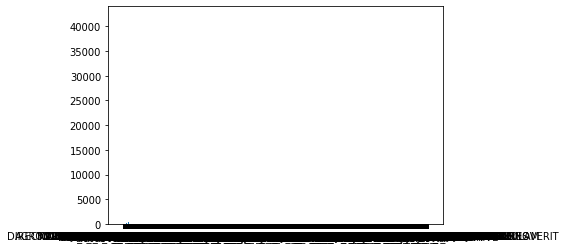

In [ ]:
hashtagNames = list(relacionHashtags.keys())
countH = list(relacionHashtags.values())

plt.bar(range(len(relacionHashtags)), countH, tick_label=hashtagNames)
plt.show()

#### La gráfica anterior es un barplot donde todo se acomodó de una forma no adecuada debido a la gran cantidad de datos, esto se perfeccionará para el reto.

Jenny:

¿Hay alguna variable que no aporta información?
En el documento existen varias variables que no aportan información relevante como user_name, user_location, user_description y is_retweet.

Si tuvieras que eliminar variables, ¿Cuáles quitarías y por qué?
Borraría; user_name porque no me sirve, user_location porque las ubicaciones pueden ser lugares inexistentes, user_description habla del usuario y no es relevante, y is_retweet porque todas la variables son iguales.

¿Existen variables que tengan datos extraños?
Las variables que tiene datos extraños son user_name, user_location, user_description que todos contienen símbolos y caracteres no comunes.

Si comparas las variables, ¿todas están en rangos similares?
Comparando las variables, sí creo que tiene rangos similares.

¿Crees que esto afecte el análisis de los datos?
Esto puede afectar el análisis ya que tendríamos varios centros.

¿Puedes encontrar grupos que se parezcan? ¿Qué grupos son estos?
Como se mencionó anteriormente sí hay grupos que pueden ser obtenidos de las variables user_followers, user_friends, user_favourites, user_verified, sources y hashtags.


Aylín 

1. ¿Hay alguna variable que no aporta información?
Todas las variables aportan información de alguna manera, pero en nuestro caso para el objetivo que teníamos alguna de ellas no nos ayudaban mucho en el analisis. 

Si tuvieras que eliminar variables, ¿Cuáles quitarías y por qué?
En este caso por el objetivo eliminaría: user_name, user_location, user_description, user_created, is_retweet. Porque no son de mucha ayuda para el análisis que queríamos realizar con averiguar si nuestra hipótesis era correcta en que si eran personas verificadas tenían menos amigos. 


2. ¿Existen variables que tengan datos extraños?

Si, en los datos de user_name podemos observar en la primera tabla de data como algunas personas deciden añadir distintos caracteres para adornar su usuario, un ejemplo puede ser ᏉᎥ☻լꂅϮ. Igualmente se pueden observar en user_description.  

3. Si comparas las variables, ¿todas están en rangos similares?

En este caso se podría decir que no porque como observamos en el describe que los mínimos son iguales ya que son 0, sin embargo el máximo son números muy distintos. 

4.  ¿Crees que esto afecte el análisis de los datos?

No lo creo, porque las que tienen distintos rangos no son muy útiles en nuestro análisis. Además de como son distintos datos pueden tener distintos rangos, pero aun así podemos realizar los distintos análisis que queremos. 

5. ¿Puedes encontrar grupos que se parezcan? ¿Qué grupos son estos?
Podemos encontrar que los grupos que más se parecen son los de likes, followers y friends. Además de que podemos ver que los usuarios que están verificados tienen más seguidores y menos amigos. Eso lo podemos ver en el mapa de calor y confirma nuestra teoría. 


Damián

¿Hay alguna variable que no aporta información?
Considero que la variable is_retweeted no aporta mucha información debido a que nunca cambia su valor.

 Si tuvieras que eliminar variables, ¿Cuáles quitarías y por qué?
Para nuestro objetivo principal, consideramos que las variables de el nombre de la persona, su descripción, su ubicación y si el tweet era un retweet, no tenían mucho que ver para el análisis que planeamos realizar.

¿Existen variables que tengan datos extraños?

Debido a que el usuario podía establecer lo que quería, la ubicación contenía datos que no nos eran muy útiles o relevantes para lo que queríamos hacer

Si comparas las variables, ¿todas están en rangos similares?

Existen variables que suceden muy juntas unas con otras, como lo son las fechas, aunque existen datos que no se encuentran en un rango parecido, como la fecha de creación del usuario donde existia mucha variabilidad

¿Crees que esto afecte el análisis de los datos?

Considero que para hacer un analisis de lo que ocurría en esas fechas, podemos ver la actividad sin tanta variabilidad en el tiempo, sin embargo, las variables que cambian mucho de rango no nos son tan útiles.
¿Puedes encontrar grupos que se parezcan? ¿Qué grupos son estos?
En la tabla de correlación se pueden encontrar los datos que tienen algo de relación, sin embargo, no es tanta. En nuestro análisis aparecieron relaciones no tan fuertes entre seguidores, verificación y número de likes.


Adrián

¿Hay alguna variable que no aporta información?
Sí, existen muchas variables que son redundantes o no aportan información relevante como lo es user_name, user_description, user_location y hashtag.

Si tuvieras que eliminar variables, ¿Cuáles quitarías y por qué?
	Las anteriormente mencionadas ya que son redundantes para el análisis.

¿Existen variables que tengan datos extraños?
user_name tiene algunos datos ilegibles, mientras que user_location no tiene sentido en cuanto a lugares físicos existentes. Además existen otras variables con datos NaN que no son legibles por no tener un dato válido. 

Si comparas las variables, ¿todas están en rangos similares?
No es fácil comparar los rangos ya que existen tipos diferentes de datos y sobre todo ya que los que sí tienen rangos comparables como los seguidores son rangos muy diferentes por el tipo de personas.

¿Crees que esto afecte el análisis de los datos?
No necesariamente ya que se sabe que los datos no son comparables en muchos casos y si esto es sabido se puede hacer el análisis por variables comparables.

¿Puedes encontrar grupos que se parezcan? ¿Qué grupos son estos?
En sí, haciendo un análisis más extenso por k-means, se podría decir que hay usuarios con cercanía debido a su número de seguidores y sus hashtags utilizados.
